In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 1. 掷色子

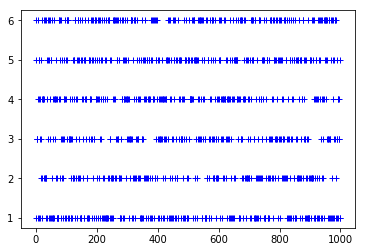

In [2]:
def  rollDie():
    return random.choice([1, 2, 3, 4, 5, 6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
        
    print(result)
    
def rollN(n):
    Y = []
    for i in range(n):
        Y.append(rollDie())
        
    return np.array(Y)

Y = rollN(1000)
plt.plot(Y, 'b+')

## 2. 抛硬币

In [3]:
def flip(numFilps):
    """返回硬币为正面的概率"""
    heads = 0
    for i in range(numFilps):
        if random.choice(['H', 'T']) == 'H':
            heads += 1
    
    return heads/numFilps

def flipSim(numFlipsPerTrial, numTrials):
    """返回多次套硬币中，硬币正面的平均概率"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [4]:
mean = flipSim(100, 100000)
print('mean = ', mean)

mean =  0.5000585999999976


## 3. 均值回归
- 如果出现一个极端的随机事件，那么下一个随机事件很可能就不是极端的

In [5]:
def regressTomean(numFilps, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFilps))
    
    extremes, nextTrials = [], []
    for i in range(len(fracHeads)-1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
          
    len_ext = len(extremes)
    len_nex = len(nextTrials)
    plt.plot(range(len_ext), extremes, 'ro', label='extremes')
    plt.plot(range(len_nex), nextTrials, 'b^', label='nextTrials')
    plt.plot(range(len_ext), [0.5]*len_ext)
    plt.xlim(-1, len_ext)
    plt.ylim(0, 1)
    plt.xlabel("Extreme Example and Next Trial")
    plt.ylabel("Fraction Heads")
    plt.title('Regression to the Mean')
    plt.legend(loc = 'best')

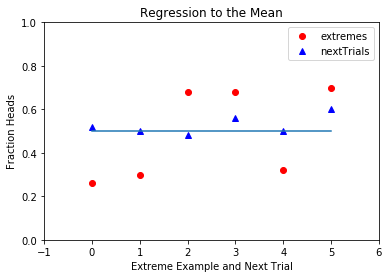

In [6]:
regressTomean(50, 500)

## 4. 大数定理
- 试验不变的条件下，重复试验多次，随机事件的频率近似于它的概率

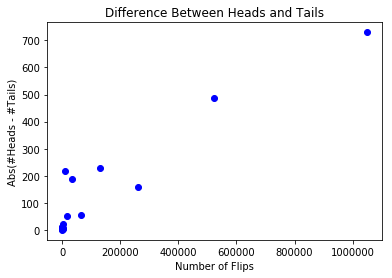

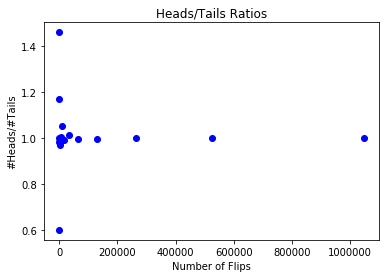

In [7]:
def flipPlot(minExp, maxExp):
    """假设minExp和maxExp是正整数； minExp<maxExp
   模拟exp次抛硬币实验，每次实验抛n次"""
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
        
    for numFlips in xAxis:
        numHeads = 0
        
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    
    plt.title('Difference Between Heads and Tails')
    plt.xlabel('Number of Flips')
    plt.ylabel('Abs(#Heads - #Tails)')
    plt.plot(xAxis, diffs, 'ob')
    plt.figure()
    plt.title('Heads/Tails Ratios')
    plt.xlabel('Number of Flips')
    plt.ylabel('#Heads/#Tails')
    plt.plot(xAxis, ratios, 'ob')
    
random.seed(0)
flipPlot(4, 20)

## 5. 分布
### 5.1 概率分布

(array([ 38.,  55., 101., 134., 161., 166., 153.,  97.,  60.,  35.]),
 array([  7. ,  25.7,  44.4,  63.1,  81.8, 100.5, 119.2, 137.9, 156.6,
        175.3, 194. ]),
 <a list of 10 Patch objects>)

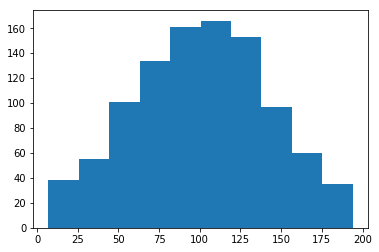

In [8]:
vals = []
for i in range(1000):
    num1 = random.choice(range(0, 101))
    num2 = random.choice(range(0, 101))
    # vals.append(num1)
    vals.append(num1+num2)

plt.hist(vals, bins=10)

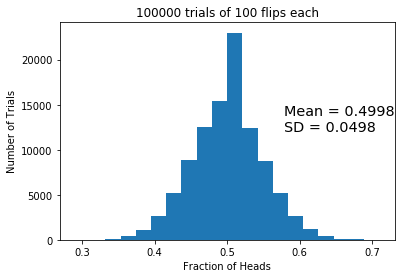

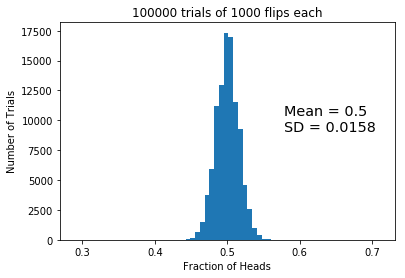

In [9]:
def flip(numFlips):
    """抛numFlips次硬币，返回正面向上的频次"""
    
    head = 0
    for i in range(numFlips):
        if random.choice(['H', 'T']) == 'H':
            head += 1
    
    return head/numFlips


def stdDev(X):
    mean = sum(X)/len(X)
    total = 0.0
    for x in X:
        total += (x - mean) ** 2
    
    var = total/len(X)
    return var ** 0.5


def flipSim(numFlipsPerTrial, numTrials):
    """进行numTrials次实验， 每次抛numFlipsPerTrial次硬币，
       返回每次实验正面向上的频次，总均值和标准差"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    
    return fracHeads, mean, sd

def labelPlot(numFlips, numTrials, mean, sd):
    plt.title(str(numTrials) + ' trials of ' + str(numFlips) + ' flips each')
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Number of Trials')
    plt.annotate('Mean = ' + str(round(mean, 4)) + '\nSD = ' + str(round(sd, 4)), \
                 size='x-large', xycoords = 'axes fraction', xy = (0.67, 0.5))


def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    plt.hist(val1, bins = 20)
    xmin,xmax = plt.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    plt.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    plt.hist(val2, bins = 20)
    plt.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

makePlots(100, 1000, 100000)

### 5.2 正太分布

大约68.27%的数据都位于距均值1个标准差的范围内，大约95.45%的数据位于距均值2个标准差的范围内，大约99.73%的数据位于距均值3个标准差的范围内。人们有时将这种情况称为68-95-99.7法则，但更多时候将其称为经验法则

(array([  4.,  10.,  12.,  10.,  20.,  29.,  57.,  79.,  89., 141., 200.,
        274., 305., 397., 504., 539., 598., 657., 683., 699., 658., 634.,
        636., 555., 511., 384., 346., 263., 199., 143., 100.,  89.,  63.,
         46.,  31.,  13.,   8.,   7.,   4.,   3.]),
 array([-3.41991959, -3.24534671, -3.07077383, -2.89620094, -2.72162806,
        -2.54705518, -2.3724823 , -2.19790942, -2.02333654, -1.84876366,
        -1.67419078, -1.4996179 , -1.32504502, -1.15047214, -0.97589926,
        -0.80132638, -0.6267535 , -0.45218062, -0.27760774, -0.10303486,
         0.07153802,  0.2461109 ,  0.42068378,  0.59525666,  0.76982954,
         0.94440242,  1.1189753 ,  1.29354818,  1.46812106,  1.64269394,
         1.81726682,  1.9918397 ,  2.16641258,  2.34098546,  2.51555834,
         2.69013122,  2.8647041 ,  3.03927698,  3.21384986,  3.38842274,
         3.56299562]),
 <a list of 40 Patch objects>)

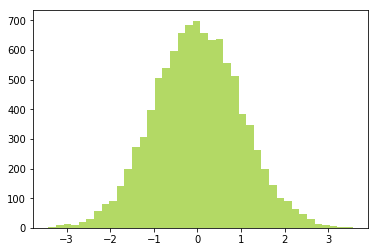

In [10]:
mu = 0
sigma = 1
x = mu +sigma*np.random.randn(10000)
plt.hist(x, 40,histtype='bar',facecolor='yellowgreen',alpha=0.75)

In [11]:
import scipy.integrate

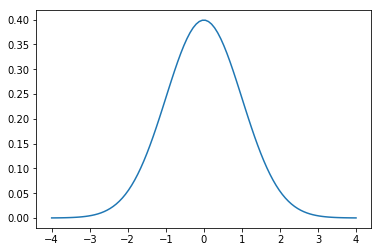

In [26]:
x = np.linspace(-4, 4, 100)
y = guassian(x, 0, 1)
plt.plot(x, y)

In [25]:
def guassian(x, mu, sigma):
    factor1 = 1.0/(sigma*((2*np.pi)**0.5))
    factor2 = np.exp(-((x-mu)**2)/(2*sigma**2))
    return factor1*factor2
#     factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
#     factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
#     return factor1*factor2


def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 2, 3):
            area = scipy.integrate.quad(guassian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print(' Fraction within', numStd, 'std =',   round(area, 4))
        
checkEmpirical(3)

For mu = 6 and sigma = 7
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973
For mu = 8 and sigma = 9
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973
For mu = 2 and sigma = 2
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973


<ErrorbarContainer object of 3 artists>

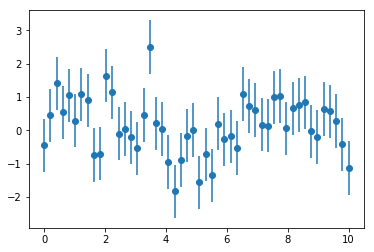

In [18]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='o')

### 5.3 连续性和离散型均匀分布

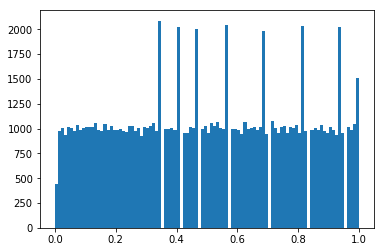

In [19]:
def uniform_distribution(n):
    nums = []
    for i in range(n):
        x = random.random()
        nums.append(round(x, 2))
    
    y = np.array(nums)
    plt.hist(nums, bins = 100)

uniform_distribution(100000)

1.0


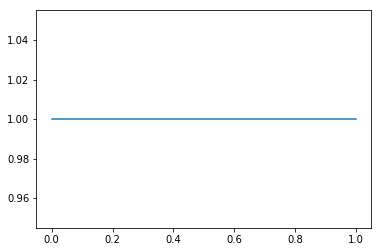

In [20]:
def uniform_distribution(a, b):
    fx = 1/(b-a)
    print(fx)
    plt.plot(range(a, b+1), [fx]*(b-a+1))

 
uniform_distribution(0, 1)

### 5.4 二项式分布与多项式分布

### 5.5 指数分布和几何分布

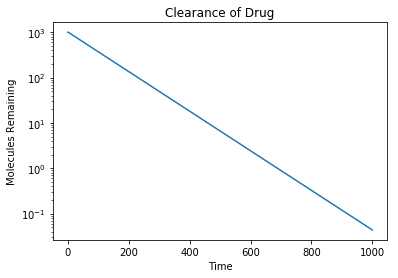

In [21]:
def clear(n, p, steps):
    """假设n和steps都是正整数， p是个浮点数
    n：分子的初始数量
    p：一个分子被清除的概率
    steps：模拟的时间长度"""
    
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*(1-p)**t)
    
    plt.semilogy(numRemaining)
    plt.xlabel('Time')
    plt.ylabel('Molecules Remaining')
    plt.title('Clearance of Drug')

clear(1000, 0.01, 1000)

Text(0.5,1,'Probability of Starting Each Try = 0.5')

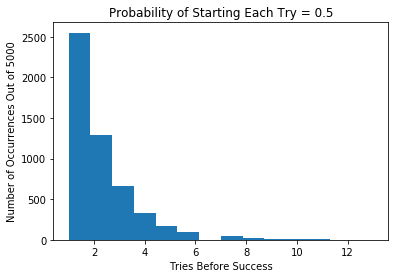

In [22]:
def successfulStarts(successProb, numTrials):
    """假设successProb是一个浮点数，表示单次尝试成功的概率。 numTrials是个正整数。
    返回一个列表，其中的元素是每次实验成功之前的尝试次数。 """
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
            triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
plt.hist(distribution, bins=14)
plt.xlabel('Tries Before Success')
plt.ylabel('Number of Occurrences Out of ' + str(numTrials))
plt.title('Probability of Starting Each Try = '+ str(probOfSuccess))


### 5.6 本福德分布
- 对于一个十进制数的集合，如果第一位数字是d的概率符合P(d) = log10(1 + 1/d)，就称它满足本福德定律

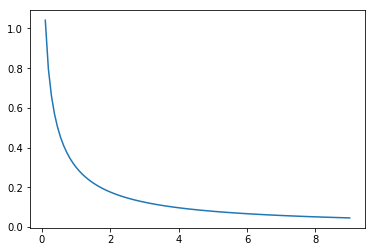

In [36]:
x = np.linspace(0.1, 9, 100)
y = np.log10(1+1/x)

plt.plot(x, y)

In [24]:
np.log10(1+1/1)

0.3010299956639812

## 6. 散列与碰撞

## 7. 强队获胜的概率